In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.ipython_showProperties = False
IPythonConsole.drawOptions.addAtomIndices=True

sdf_file = "../data/example.sdf"
model_path = "../data/example_model.pt"
extraction_path = "../data/example_extraction.csv"

In [61]:
mol_sup = Chem.SDMolSupplier(sdf_file, removeHs=False)
mol_index = 15
mol = mol_sup[mol_index]
df_extraction = pd.read_csv(extraction_path)

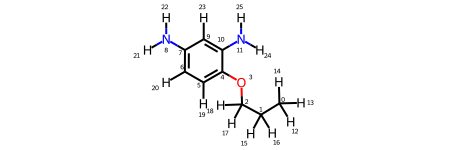

In [62]:
rdDepictor.Compute2DCoords(mol)
mol

In [63]:
df_mol_index = df_extraction[df_extraction["mol_index"] == mol_index]

In [64]:
att_atom_10 = eval(df_mol_index[df_mol_index["idx_in_mol"] == 10]["node_attentions"].values[0])
att_atom_0 = eval(df_mol_index[df_mol_index["idx_in_mol"] == 0]["node_attentions"].values[0])
att_atom_4 = eval(df_mol_index[df_mol_index["idx_in_mol"] == 4]["node_attentions"].values[0])

In [65]:
def normalize_attention_between_0_and_1(att):
    att = np.array(att)
    att = att - att.min()
    att = att / att.max()
    return att

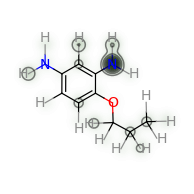

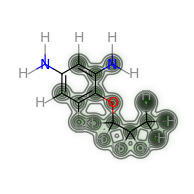

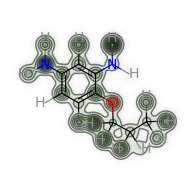

In [66]:
plt_att_10 = SimilarityMaps.GetSimilarityMapFromWeights(mol, normalize_attention_between_0_and_1(att_atom_10), size=(100, 100))
plt_att_0 = SimilarityMaps.GetSimilarityMapFromWeights(mol, normalize_attention_between_0_and_1(att_atom_0), size=(100, 100))
plt_att_4 = SimilarityMaps.GetSimilarityMapFromWeights(mol, normalize_attention_between_0_and_1(att_atom_4), size=(100, 100))

In [67]:
# count all elements in the dataset and all morgen fingerprint r=2
elemnts_counter = {}
mf2_counter = {}
for mol in mol_sup:
    for atom in mol.GetAtoms():
        elemnts_counter[atom.GetSymbol()] = elemnts_counter.get(atom.GetSymbol(), 0) + 1
        bitInfo = {}
        fp = Chem.RDKFingerprint(mol, maxPath=2, bitInfo=bitInfo)
        for bitId, atomIds in bitInfo.items():
            mf2_counter[bitId] = mf2_counter.get(bitId, 0) + len(atomIds)

In [68]:
df_elements = pd.DataFrame.from_dict(elemnts_counter, orient="index", columns=["count"])

<AxesSubplot:>

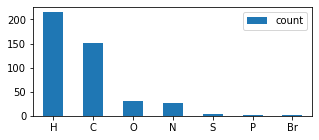

In [72]:
df_elements.sort_values(by="count", ascending=False).plot.bar(figsize=(5, 2), rot=0)

In [73]:
df_mf2 = pd.DataFrame.from_dict(mf2_counter, orient="index", columns=["count"])

<AxesSubplot:>

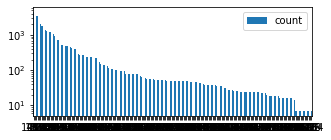

In [76]:
df_mf2.sort_values(by="count", ascending=False).plot.bar(figsize=(5, 2), rot=0, logy=True)


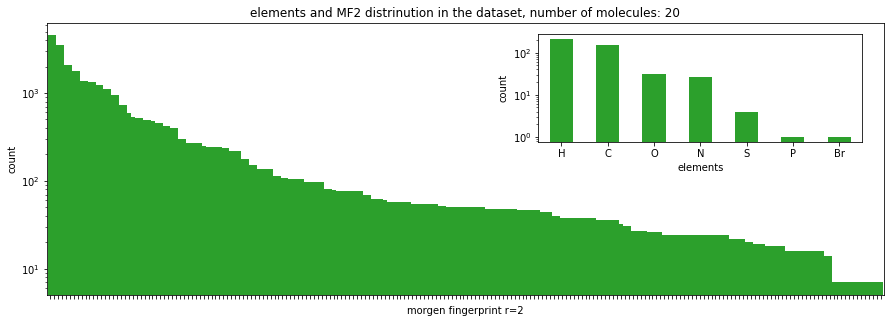

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
df_mf2.sort_values(by="count", ascending=False).plot.bar(ax=ax, rot=0, logy=True, width=1.1, color="C2")   
ax.set_xticklabels([])
ax.set_xlabel("morgen fingerprint r=2")
ax.set_ylabel("count")
# inset with elements
ax_inset = fig.add_axes([0.58, 0.55, 0.3, 0.3])
df_elements.sort_values(by="count", ascending=False).plot.bar(ax=ax_inset, rot=0, logy=True, color="C2")
ax_inset.set_xlabel("elements")
ax_inset.set_ylabel("count")
ax.set_title(f"elements and MF2 distrinution in the dataset, number of molecules: {len(mol_sup)}")
ax.legend().set_visible(False)
ax_inset.legend().set_visible(False)
plt.savefig("elements_and_mf2.pdf")
plt.show()